
# Visualizing Fields in gwexpy

This tutorial demonstrates the new dimension-aware plotting capabilities for `ScalarField`, `VectorField`, and `TensorField`.
We will cover:
1.  **Scalar Field Maps**: Slicing 4D data into 2D heatmaps.
2.  **Vector Visualization**: Quiver (arrows) and Streamline plots.
3.  **Tensor Components**: Grid visualization of tensor components.
4.  **Animation**: Creating movies of time-varying fields.
    

In [1]:

import matplotlib

# Fix gwpy backend detection issue: explicit full module path for inline
# Must process BEFORE importing pyplot
try:
    import matplotlib_inline.backend_inline
    matplotlib.use('module://matplotlib_inline.backend_inline')
except (ImportError, ValueError):
    pass

import matplotlib.pyplot as plt
from astropy import units as u

# For animation display
from IPython.display import HTML

from gwexpy.fields import TensorField, VectorField, make_demo_scalar_field



## 1. Create Demo Data

We'll generate a 4D `ScalarField` representing a propagating wave, and construct Vector/Tensor fields from it.
    

In [2]:

# Generate a propagating Gaussian pulse
# t: 50 steps, x, y, z: 16 steps
f_scalar = make_demo_scalar_field(
    pattern='gaussian',
    nt=50, nx=16, ny=16, nz=16,
    dt=0.1*u.s, dx=0.1*u.m,
    unit=u.V
)
print(f"ScalarField: {f_scalar.shape} {f_scalar.unit}")

# Create a VectorField (E-field like)
# Ex = scalar, Ey = 0.5 * scalar, Ez = 0
vx = f_scalar.copy()
vy = f_scalar * 0.5
vz = f_scalar * 0.0
# Add some vorticity to make streamlines interesting
# Simple rotation: (y, -x) around center
# We'll just add manual noise/structure for demo
# Ensure unit matches vy (which is V)
noise = make_demo_scalar_field('sine', nt=50, nx=16, ny=16, nz=16, seed=123, unit=u.V)
vy += noise * 0.2

v_field = VectorField({'x': vx, 'y': vy, 'z': vz})
print(f"VectorField components: {list(v_field.keys())}")


ScalarField: (50, 16, 16, 16) V
VectorField components: ['x', 'y', 'z']



## 2. Scalar Field Visualization

Use `.plot()` to visualize a 2D slice. You can specify which axes to plot (`x`, `y`) and fix others (`z=...`, `t=...`).
    

<Figure size 800x600 with 0 Axes>

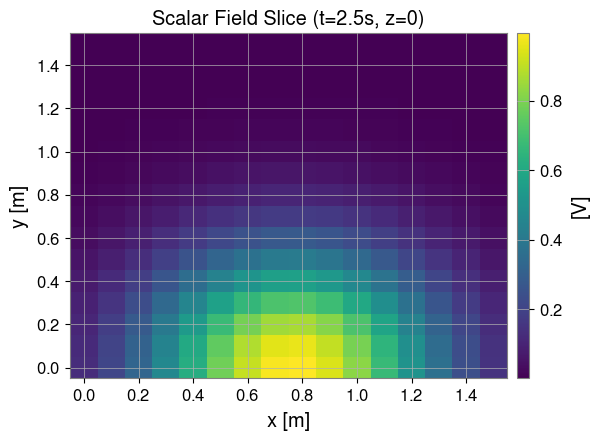

In [3]:

# Plot X-Y slice at t=2.5s (approx center index 25) and z=0
# Note: x='x', y='y' are axis names.
# Keyword arguments matching axis names (t, z) are used for slicing.
fig = plt.figure(figsize=(8, 6))
# Method 1: passing values
p = f_scalar.plot(x='x', y='y', t=2.5*u.s, z=0*u.m, cmap='viridis')
plt.title("Scalar Field Slice (t=2.5s, z=0)")
plt.show()


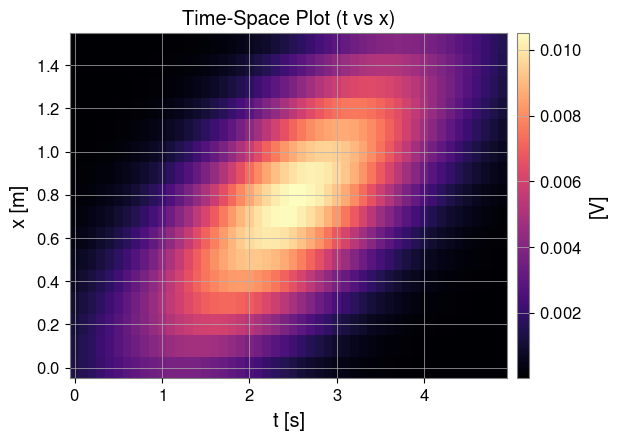

In [4]:

# Plot T-X slice (Time-Space diagram) at y=center, z=center
# This shows propagation over time
# We use slices={'y': ...} because 'y' argument is used for plot scaling
t_x_slice = f_scalar.plot(x='t', y='x', slices={'y': 0.8*u.m}, z=0.8*u.m, cmap='magma')
plt.title("Time-Space Plot (t vs x)")
plt.show()



## 3. Vector Field Visualization

`VectorField` supports `quiver()` (arrows), `streamline()` (flow lines), and `plot()` (magnitude + arrows).
    

<Figure size 800x600 with 0 Axes>

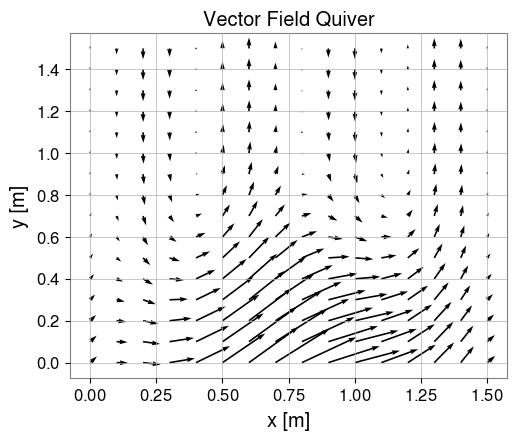

In [5]:

# Quiver Plot (Arrows)
# Slicing at t=2.5s, z=0
plt.figure(figsize=(8, 6))
v_field.quiver(x='x', y='y', t=2.5*u.s, z=0*u.m, color='black')
plt.title("Vector Field Quiver")
plt.show()


<Figure size 800x600 with 0 Axes>

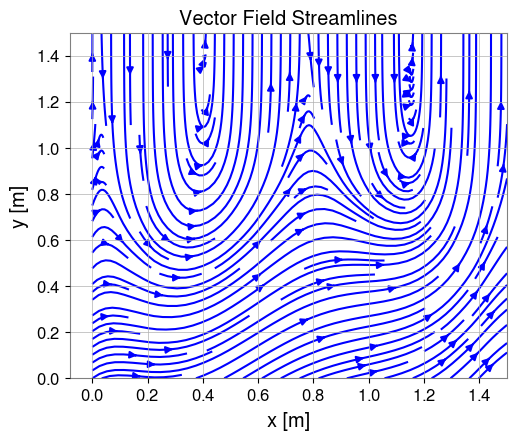

In [6]:

# Streamline Plot (Flow)
plt.figure(figsize=(8, 6))
v_field.streamline(x='x', y='y', t=2.5*u.s, z=0*u.m, color='blue', density=1.5)
plt.title("Vector Field Streamlines")
plt.show()


<Figure size 1000x800 with 0 Axes>

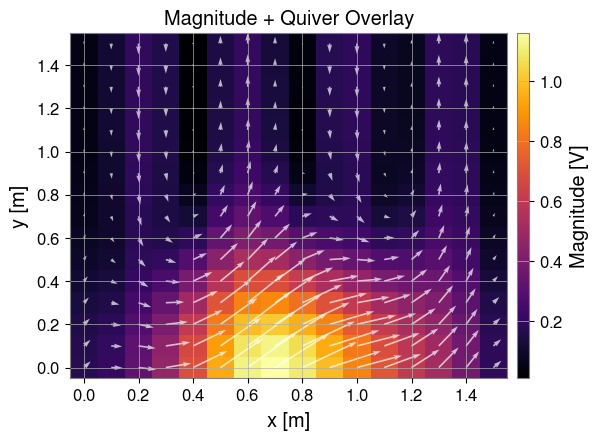

In [7]:

# Combined Plot: Magnitude (Color) + Quiver (Arrows)
plt.figure(figsize=(10, 8))
v_field.plot(x='x', y='y', t=2.5*u.s, z=0*u.m, cmap='inferno')
plt.title("Magnitude + Quiver Overlay")
plt.show()



## 4. Tensor Field Components

`plot_components()` displays all components of a rank-2 tensor in a grid.
    

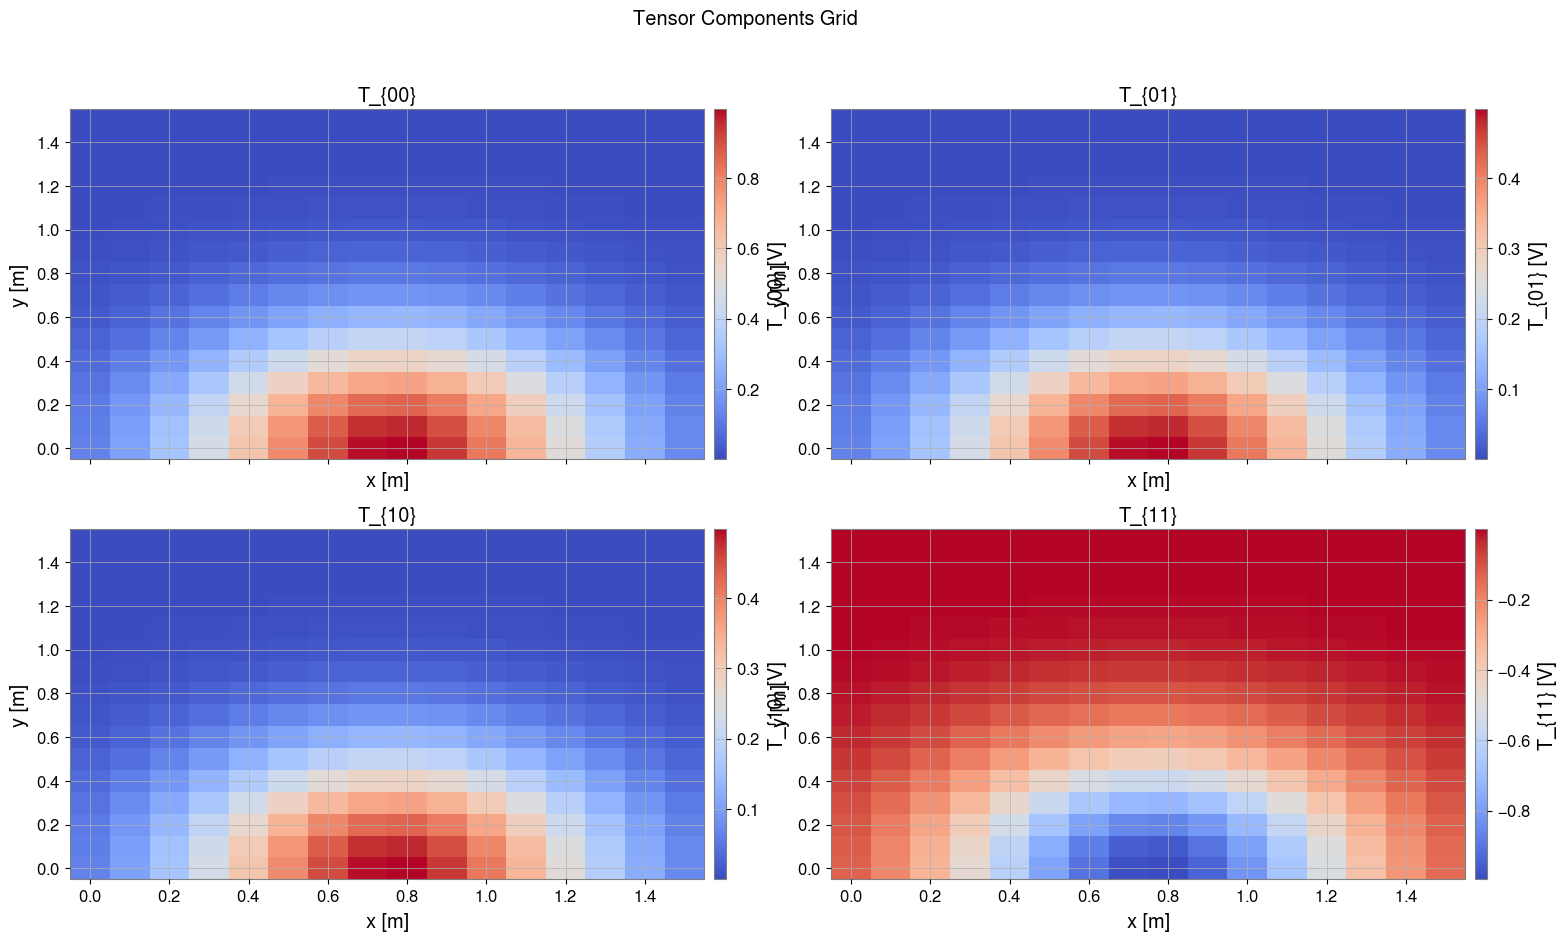

In [8]:

# Create a dummy TensorField
T = TensorField({
    (0, 0): f_scalar,       (0, 1): f_scalar * 0.5,
    (1, 0): f_scalar * 0.5, (1, 1): f_scalar * -1.0
}, rank=2)

# Plot components grid
fp = T.plot_components(x='x', y='y', t=2.5*u.s, z=0*u.m, cmap='coolwarm')
fp.suptitle("Tensor Components Grid")
plt.show()



## 5. Animation

Use `.animate(axis='t')` to see how the field evolves.
    

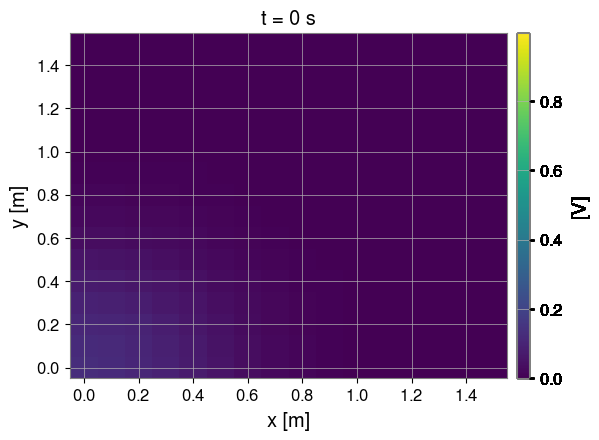

In [9]:

# Animate the Scalar Field propagation along Time axis
# We slice at z=0
# Note: interval is in ms
anim = f_scalar.animate(x='x', y='y', axis='t', z=0*u.m, interval=50, cmap='viridis')

# Display as HTML5 video (requires ffmpeg)
try:
    display(HTML(anim.to_html5_video()))
except Exception as e:
    print(f"Could not render video: {e}")
    print("Ensure ffmpeg is installed.")
